<a href="https://colab.research.google.com/github/Agoroschuk/ML_tasks/blob/main/lab_2/asg_lab02_part3_poetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs.

You have several choices here:

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [ ]:
import string
import os
import torch.nn as nn
import torch
import numpy as np
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
np.random.seed(42)

### Data loading: Shakespeare (-)

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnets.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [ ]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks_basic/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    shakespeare_text = iofile.readlines()

TEXT_START = 45
TEXT_END = -368
shakespeare_text = shakespeare_text[TEXT_START : TEXT_END]
assert len(shakespeare_text) == 2616

In [ ]:
print(type(shakespeare_text))
shakespeare_text[:100]

<class 'list'>


['  From fairest creatures we desire increase,\n',
 "  That thereby beauty's rose might never die,\n",
 '  But as the riper should by time decease,\n',
 '  His tender heir might bear his memory:\n',
 '  But thou, contracted to thine own bright eyes,\n',
 "  Feed'st thy light's flame with self-substantial fuel,\n",
 '  Making a famine where abundance lies,\n',
 '  Thy self thy foe, to thy sweet self too cruel:\n',
 "  Thou that art now the world's fresh ornament,\n",
 '  And only herald to the gaudy spring,\n',
 '  Within thine own bud buriest thy content,\n',
 "  And tender churl mak'st waste in niggarding:\n",
 '    Pity the world, or else this glutton be,\n',
 "    To eat the world's due, by the grave and thee.\n",
 '\n',
 '  II\n',
 '\n',
 '  When forty winters shall besiege thy brow,\n',
 "  And dig deep trenches in thy beauty's field,\n",
 "  Thy youth's proud livery so gazed on now,\n",
 "  Will be a tatter'd weed of small worth held:\n",
 '  Then being asked, where all thy beaut

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [ ]:
# strip('\n') удаляет символы переноса строки из начала и конца строки
processed_shakespeare_text = ' '.join(elem.strip('\n').lower() for elem in shakespeare_text)

In [ ]:
len(processed_shakespeare_text)

100224

In [ ]:
print(processed_shakespeare_text[:1000])

  from fairest creatures we desire increase,   that thereby beauty's rose might never die,   but as the riper should by time decease,   his tender heir might bear his memory:   but thou, contracted to thine own bright eyes,   feed'st thy light's flame with self-substantial fuel,   making a famine where abundance lies,   thy self thy foe, to thy sweet self too cruel:   thou that art now the world's fresh ornament,   and only herald to the gaudy spring,   within thine own bud buriest thy content,   and tender churl mak'st waste in niggarding:     pity the world, or else this glutton be,     to eat the world's due, by the grave and thee.    ii    when forty winters shall besiege thy brow,   and dig deep trenches in thy beauty's field,   thy youth's proud livery so gazed on now,   will be a tatter'd weed of small worth held:   then being asked, where all thy beauty lies,   where all the treasure of thy lusty days;   to say, within thine own deep sunken eyes,   were an all-eating shame, and

In [ ]:
processed_shakespeare_text[:1000]

"  from fairest creatures we desire increase,   that thereby beauty's rose might never die,   but as the riper should by time decease,   his tender heir might bear his memory:   but thou, contracted to thine own bright eyes,   feed'st thy light's flame with self-substantial fuel,   making a famine where abundance lies,   thy self thy foe, to thy sweet self too cruel:   thou that art now the world's fresh ornament,   and only herald to the gaudy spring,   within thine own bud buriest thy content,   and tender churl mak'st waste in niggarding:     pity the world, or else this glutton be,     to eat the world's due, by the grave and thee.    ii    when forty winters shall besiege thy brow,   and dig deep trenches in thy beauty's field,   thy youth's proud livery so gazed on now,   will be a tatter'd weed of small worth held:   then being asked, where all thy beauty lies,   where all the treasure of thy lusty days;   to say, within thine own deep sunken eyes,   were an all-eating shame, an

In [ ]:
set(processed_shakespeare_text)

{' ',
 '!',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [ ]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here

# длина не сошлась
# assert len(new_text) == 100225, 'Are you sure you have concatenated all the strings?'
# string.ascii_uppercase = все заглавные буквы англ.алфавита, set(processed_shakespeare_text) - все символы, встречающиеся в тексте
assert not any([x in set(processed_shakespeare_text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


### Data loading: "Евгений Онегин"


In [ ]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt

with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()

--2025-12-14 16:24:19--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt’

onegin.txt          100%[===================>] 256.37K  --.-KB/s    in 0.01s   

2025-12-14 16:24:20 (20.3 MB/s) - ‘onegin.txt’ saved [262521/262521]



In [ ]:
print('Onegin text length in sentences:\n', len(text))
print('Beginning of text:\n')
text[:10]

Onegin text length in sentences:
 7088
Beginning of text:



['\n',
 'I\n',
 '\n',
 '\t\t«Мой дядя самых честных правил,\n',
 '\t\tКогда не в шутку занемог,\n',
 '\t\tОн уважать себя заставил\n',
 '\t\tИ лучше выдумать не мог.\n',
 '\t\tЕго пример другим наука;\n',
 '\t\tНо, боже мой, какая скука\n',
 '\t\tС больным сидеть и день и ночь,\n']

In [ ]:
text = [x.replace('\t\t', '') for x in text]
text = [x.lower().replace('\n', '') for x in text]
print(type(text))

<class 'list'>


In [ ]:
print('Onegin text length in sentences:\n', len(text))
print('Beginning of text:\n')
text[:10]

Onegin text length in sentences:
 7088
Beginning of text:



['',
 'i',
 '',
 '«мой дядя самых честных правил,',
 'когда не в шутку занемог,',
 'он уважать себя заставил',
 'и лучше выдумать не мог.',
 'его пример другим наука;',
 'но, боже мой, какая скука',
 'с больным сидеть и день и ночь,']

In [ ]:
print('End of text:\n')
text[-10:]

End of text:



['без них онегин дорисован.',
 'а та, с которой образован',
 'татьяны милый идеал…',
 'о много, много рок отъял!',
 'блажен, кто праздник жизни рано',
 'оставил, не допив до дна',
 'бокала полного вина,',
 'кто не дочел ее романа',
 'и вдруг умел расстаться с ним,',
 'как я с онегиным моим.']

In [ ]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
joined_text = ' '.join(elem for elem in text)

In [ ]:
print('Text after joining all strings in one')
print('Onegin text length in symbols:\n', len(joined_text))
print(joined_text[:1000])

Text after joining all strings in one
Onegin text length in symbols:
 141887
 i  «мой дядя самых честных правил, когда не в шутку занемог, он уважать себя заставил и лучше выдумать не мог. его пример другим наука; но, боже мой, какая скука с больным сидеть и день и ночь, не отходя ни шагу прочь! какое низкое коварство полуживого забавлять, ему подушки поправлять, печально подносить лекарство, вздыхать и думать про себя: когда же черт возьмет тебя!»    ii  так думал молодой повеса, летя в пыли на почтовых, всевышней волею зевеса наследник всех своих родных. — друзья людмилы и руслана! с героем моего романа без предисловий, сей же час позвольте познакомить вас: онегин, добрый мой приятель, родился на брегах невы, где, может быть, родились вы или блистали, мой читатель; там некогда гулял и я: но вреден север для меня   iii  служив отлично-благородно, долгами жил его отец, давал три бала ежегодно и промотался наконец. судьба евгения хранила: сперва madame за ним ходила, потом monsieur ее с

In [ ]:
assert not any([x in set(joined_text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('No uppercase letters found!')

No uppercase letters found!


**Явно системная информация в начале и в конце текста отсутствует**

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

Put all the characters, that you've seen in the text, into variable `tokens`.

In [ ]:
tokens = sorted(set(joined_text))

In [ ]:
len(tokens) #82 токена, а не 38

82

In [ ]:
print('Before sorting', list(set(joined_text)))
print('After sorting', sorted(set(joined_text)))

Before sorting ['ш', 'k', 'е', '7', 'а', 'e', 'р', 'л', 'ъ', 'f', '…', 'c', 'a', '»', 'q', 'о', 'к', 'у', '8', 'v', 'м', 'ч', 'u', 'b', '’', 'ю', 'n', 'д', 'r', '^', '«', 'щ', 'm', '—', '-', '!', 'ж', 'н', 'ц', 'x', 'б', 'w', 'й', 'з', '.', 'y', 'т', 'с', 'ь', ' ', 'l', 't', ';', '[', 'в', ',', '–', '5', 'z', 's', 'ы', '(', 'я', '€', 'г', 'ё', 'p', ']', 'и', 'х', '?', 'п', 'ф', 'э', ')', ':', '9', 'i', 'g', 'h', 'o', 'd']
After sorting [' ', '!', '(', ')', ',', '-', '.', '5', '7', '8', '9', ':', ';', '?', '[', ']', '^', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '«', '»', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', '–', '—', '’', '…', '€']


Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [ ]:
# Your great code here
idx_to_token = {}
token_to_idx = {}
for i, token in enumerate(tokens):
  idx_to_token[i] = token

for i, token in idx_to_token.items():
  token_to_idx[token] = i

print(idx_to_token)
print(token_to_idx)

{0: ' ', 1: '!', 2: '(', 3: ')', 4: ',', 5: '-', 6: '.', 7: '5', 8: '7', 9: '8', 10: '9', 11: ':', 12: ';', 13: '?', 14: '[', 15: ']', 16: '^', 17: 'a', 18: 'b', 19: 'c', 20: 'd', 21: 'e', 22: 'f', 23: 'g', 24: 'h', 25: 'i', 26: 'k', 27: 'l', 28: 'm', 29: 'n', 30: 'o', 31: 'p', 32: 'q', 33: 'r', 34: 's', 35: 't', 36: 'u', 37: 'v', 38: 'w', 39: 'x', 40: 'y', 41: 'z', 42: '«', 43: '»', 44: 'а', 45: 'б', 46: 'в', 47: 'г', 48: 'д', 49: 'е', 50: 'ж', 51: 'з', 52: 'и', 53: 'й', 54: 'к', 55: 'л', 56: 'м', 57: 'н', 58: 'о', 59: 'п', 60: 'р', 61: 'с', 62: 'т', 63: 'у', 64: 'ф', 65: 'х', 66: 'ц', 67: 'ч', 68: 'ш', 69: 'щ', 70: 'ъ', 71: 'ы', 72: 'ь', 73: 'э', 74: 'ю', 75: 'я', 76: 'ё', 77: '–', 78: '—', 79: '’', 80: '…', 81: '€'}
{' ': 0, '!': 1, '(': 2, ')': 3, ',': 4, '-': 5, '.': 6, '5': 7, '7': 8, '8': 9, '9': 10, ':': 11, ';': 12, '?': 13, '[': 14, ']': 15, '^': 16, 'a': 17, 'b': 18, 'c': 19, 'd': 20, 'e': 21, 'f': 22, 'g': 23, 'h': 24, 'i': 25, 'k': 26, 'l': 27, 'm': 28, 'n': 29, 'o': 30, '

In [ ]:
def to_matrix(data, token_to_idx, max_len=None, dtype='int32', batch_first=True):
    max_len = max_len or max(map(len, data))
    # здесь data = (BATCH_SIZE) случайных предложения
    # BATCH_SIZE*MAX_LENGTH np.array из нулей + padding
    data_ix = np.zeros([len(data), max_len], dtype) + token_to_idx[' ']

    # цикл по BATCH_SIZE предложений
    for i in range(len(data)):
        # list comprehension по MAX_LEN
        # берем предложение data[i] и для каждого символа в нем ищем id по словарю token_to_idx
        line_ix = [token_to_idx[c] for c in data[i]]
        # 1-ю строку заполняем id символов в ней, потом 2-ю строку и т.д.
        data_ix[i, :len(line_ix)] = line_ix

    if not batch_first:
        data_ix = np.transpose(data_ix)

    return data_ix

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*
**У меня получается 82 токена**

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's Pushkin poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [ ]:
BATCH_SIZE = 512
MAX_LENGTH = max(map(len, text))
MAX_LENGTH
num_tokens = len(tokens)
num_tokens

82

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

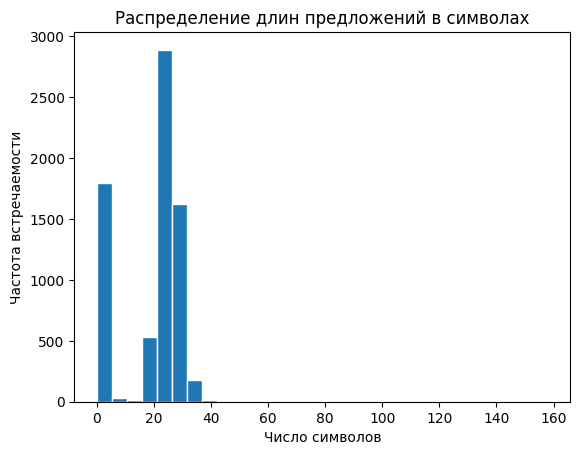

In [ ]:
plt.hist(list(map(len, text)), bins=30, edgecolor='white')
plt.title('Распределение длин предложений в символах')
plt.xlabel('Число символов')
plt.ylabel('Частота встречаемости')
plt.show()

In [ ]:
print(sorted(list(map(len, text)), reverse=True)[:20])

[158, 63, 62, 54, 48, 41, 41, 40, 40, 38, 38, 38, 38, 37, 37, 37, 36, 36, 36, 36]


In [ ]:
longest_str = [x for x in text if len(x) == 158]
second_longest_str = [x for x in text if len(x) == 63]
print(longest_str)
print(second_longest_str)

['уж отворял свой васисдас                                                                                                                                     .']
['и он мурлыкал: benedetta[78 - benedetta – благословенна (ит.).]']


In [ ]:
print('\n'.join(text[::2000]))
print(to_matrix(text[::2000], token_to_idx))


и безнадежный эгоизм.
вдруг двери настежь. ленский входит,
как величавая луна,
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [52  0 45 49 51 57 44 48 49 50 57 71 53  0 73 47 58 52 51 56  6  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [46 48 60 63 47  0 48 46 49 60 52  0 57 44 61 62 49 50 72  6  0 55 49 57
  61 54 52 53  0 46 65 58 48 52 62  4]
 [54 44 54  0 46 49 55 52 67 44 46 44 75  0 55 63 57 44  4  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]]


### Building the model (vanilla RNN)

Готовый вариант доступен, например, в `torch.nn.RNN`.

Рекуррентную нейронную сеть можно рассматривать как последовательное применение плотного слоя к входу $x_t$ и предыдущему состоянию rnn $h_t$.
<img src="https://raw.githubusercontent.com/neychev/small_DL_repo/master/rnn.png" width=480>

Также нам понадобятся:
* Embedding-слой, который преобразует индекс токена $x_t$ в вектор. Принцип его действия аналогичен word2vec, который был рассмотрен ранее. Основное отличие: параметры обучаются непосредственно на данную задачу.
* Выходной слой, который предсказывает вероятность следующего токена.

In [ ]:
class VanillaCharRNN(nn.Module):
    """
    Implement the scheme above as torch module
    """
    # соответствие num_tokens <-> input_size, rnn_num_units <-> hidden_dim
    # rnn_num_units - размерность вектора скрытого состояния (емкость памяти на 1 шаг)
    # embedding_size - размерность формируемых эмбеддингов
    def __init__(self, num_tokens=len(tokens), embedding_size=100, rnn_num_units=1024):
        super().__init__()

        self.num_units = rnn_num_units
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)

    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.

        :param x: batch of character ids, containing vector of int64
        :param h_prev: previous rnn hidden states, containing matrix [batch, rnn_num_units] of float32
        """
        # get vector embedding of x
        # batch, seq leng, emb dim
        x_emb = self.embedding(x)

        # compute next hidden state using self.rnn_update
        x_and_h = torch.cat([x_emb, h_prev], dim=1)
        h_next = self.rnn_update(x_and_h)
        h_next = torch.tanh(h_next)

        assert h_next.size() == h_prev.size()

        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next)

        return h_next, logits

    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units)

In [ ]:
def rnn_loop(rnn, batch_index):
    batch_size, max_length = batch_index.size()
    hid_state = rnn.initial_state(batch_size).to(device)
    logits = []

    for x_t in batch_index.transpose(0,1):
        hid_state, logit_next = rnn(x_t, hid_state) # dim = [batch_size, hidden_dim]
        logits.append(logit_next) # dim = [batch_size, num_tokens]

    return torch.stack(logits, dim=1)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
char_rnn = VanillaCharRNN().to(device)
opt = torch.optim.Adam(char_rnn.parameters(), lr = 5e-3)
history = []
# CrossEntropyLoss требует логитов, а nn.NLLLoss требует log-probabilities (negative log-likelihood loss)
loss_func = nn.CrossEntropyLoss()

In [ ]:
char_rnn

VanillaCharRNN(
  (embedding): Embedding(82, 100)
  (rnn_update): Linear(in_features=1124, out_features=1024, bias=True)
  (rnn_to_logits): Linear(in_features=1024, out_features=82, bias=True)
)

Plot the loss function (axis X: number of epochs, axis Y: loss function).

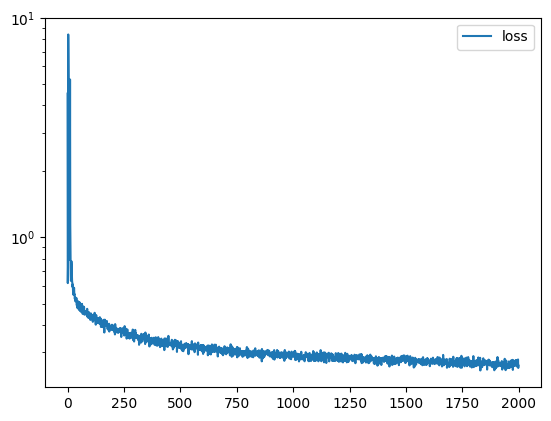

CPU times: user 3min 52s, sys: 287 ms, total: 3min 52s
Wall time: 2min 58s


In [ ]:
%%time
for i in range(2000):
    opt.zero_grad()

    batch_ix = to_matrix(random.sample(text, BATCH_SIZE), token_to_idx, max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64).to(device)

    logits_seq = rnn_loop(char_rnn, batch_ix)

    # берем все предсказания, кроме последнего столбца для predictions_logp,
    # т.к. предсказываем следующий токен (так создается сдвиг)
    predictions_logits = logits_seq[:, :-1]
    # предсказываем все, кроме начальных значений
    actual_next_tokens = batch_ix[:, 1:]

    loss = loss_func(
        predictions_logits.reshape((-1, num_tokens)),
        actual_next_tokens.reshape(-1)
    )
    loss.backward()
    opt.step()


    history.append(loss.cpu().data.numpy())

    if (i + 1) % 50 == 0:
      clear_output(True)
      plt.plot(history,label='loss')
      plt.yscale('log')
      plt.legend()
      plt.show()

In [ ]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=MAX_LENGTH, temperature=0.3):
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1).to(device)

    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i].to(device), hid_state)

    for _ in range(max_length - len(seed_phrase)):
        hid_state, logit_next = char_rnn(x_sequence[:, -1].to(device), hid_state)

        p_next = F.softmax(logit_next / temperature, dim=-1).cpu().data.numpy()[0]
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)

    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [ ]:
# An example of generated text.
for _ in range(20):
    print(generate_sample(char_rnn, seed_phrase=' ленский ',temperature=0.4))

 ленский словельный послушно в сомно слованья,                                                                                                                
 ленский наше с ней свет своей,                                                                                                                               
 ленский я он воловит и сольно нему сос не в ней состиванный,                                                                                                 
 ленский и сохность он баров,                                                                                                                                 
 ленский он он он воль смород с ней сам перанья                                                                                                               
 ленский собольно в сохной                                                                                                                                    
 ленский восьмо славить и послемо он словы сво

### More poetic model (LSTM)

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [ ]:
class CharLSTM(nn.Module):
    def __init__(self, num_tokens=len(tokens), embedding_size=100, lstm_num_units=1024):
        """Появляется долгосрочная память c_t по сравнению с RNN. h_t - краткосрочная память (была и в RNN)"""
        super().__init__()
        self.num_units = lstm_num_units
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.ig = nn.Linear(embedding_size + lstm_num_units, lstm_num_units) # for input gate
        self.fg = nn.Linear(embedding_size + lstm_num_units, lstm_num_units) # for forget gate
        self.ac = nn.Linear(embedding_size + lstm_num_units, lstm_num_units) # for add cell
        self.og = nn.Linear(embedding_size + lstm_num_units, lstm_num_units) # for output gate
        self.lstm_to_logits = nn.Linear(lstm_num_units, num_tokens)

    def forward(self, x, h_prev, c_prev):
        x_emb = self.embedding(x)
        # h_prev = инфо с прошлого шага, x = новые данные
        x_and_h = torch.cat([x_emb, h_prev], dim=1) # dim = [batch_size, embedding_size + lstm_num_units]
        input_gate = F.sigmoid(self.ig(x_and_h))
        forget_gate = F.sigmoid(self.fg(x_and_h))
        c_add = F.tanh(self.ac(x_and_h))
        output_gate = F.sigmoid(self.og(x_and_h))

        c_next = c_prev * forget_gate + input_gate * c_add
        h_next = F.tanh(c_next) * output_gate

        assert c_next.size() == c_prev.size()
        assert h_next.size() == h_prev.size()

        # h_next: [batch_size, lstm_num_units] (вектор скрытого состояния)
        # logits: [batch_size, num_tokens] для каждого образца распределение логитов по словарю
        logits = self.lstm_to_logits(h_next)
        return h_next, c_next, logits

    def initial_state(self, batch_size):
        return (torch.zeros(batch_size, self.num_units), # h_0 (краткосрочная память)
                torch.zeros(batch_size, self.num_units)) # c_0 (долгосрочная память)

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [ ]:
def lstm_loop(lstm, batch_index):
    batch_size, max_length = batch_index.size()
    hid_state, cell_state = lstm.initial_state(batch_size)
    hid_state=hid_state.to(device)
    cell_state=cell_state.to(device)
    logits = []

    for x_t in batch_index.transpose(0,1):
        hid_state, cell_state, logit_next = lstm(x_t, hid_state, cell_state)
        logits.append(logit_next)

    return torch.stack(logits, dim=1)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
char_lstm = CharLSTM().to(device)
opt = torch.optim.Adam(char_lstm.parameters(), lr = 5e-3)
history = []
# CrossEntropyLoss требует логитов, а nn.NLLLoss требует log-probabilities (negative log-likelihood loss)
loss_func = nn.CrossEntropyLoss()

In [ ]:
char_lstm

CharLSTM(
  (embedding): Embedding(82, 100)
  (ig): Linear(in_features=1124, out_features=1024, bias=True)
  (fg): Linear(in_features=1124, out_features=1024, bias=True)
  (ac): Linear(in_features=1124, out_features=1024, bias=True)
  (og): Linear(in_features=1124, out_features=1024, bias=True)
  (lstm_to_logits): Linear(in_features=1024, out_features=82, bias=True)
)

Plot the loss function (axis X: number of epochs, axis Y: loss function).

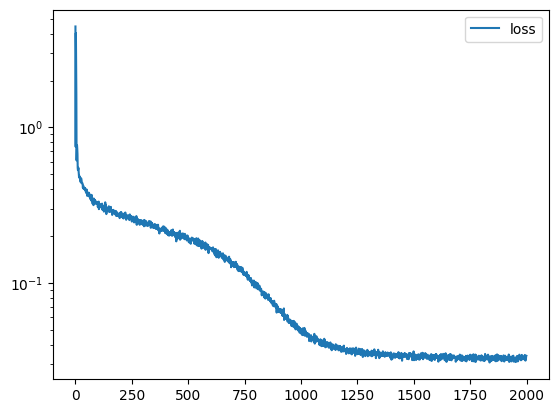

CPU times: user 8min 51s, sys: 10.9 s, total: 9min 2s
Wall time: 8min 7s


In [ ]:
%%time
for i in range(2000):
    opt.zero_grad()

    batch_ix = to_matrix(random.sample(text, BATCH_SIZE), token_to_idx, max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64).to(device)

    logits_seq = lstm_loop(char_lstm, batch_ix)

    # берем все предсказания, кроме последнего столбца для predictions_logp,
    # т.к. предсказываем следующий токен (так создается сдвиг)
    predictions_logits = logits_seq[:, :-1]
    # предсказываем все, кроме начальных значений
    actual_next_tokens = batch_ix[:, 1:]

    loss = loss_func(
        predictions_logits.reshape((-1, num_tokens)),
        actual_next_tokens.reshape(-1)
    )
    loss.backward()
    opt.step()


    history.append(loss.cpu().data.numpy())

    if (i + 1) % 50 == 0:
      clear_output(True)
      plt.plot(history,label='loss')
      plt.yscale('log')
      plt.legend()
      plt.show()

In [ ]:
def generate_sample_lstm(lstm, seed_phrase=' ', max_length=MAX_LENGTH, temperature=0.3):
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state, cell_state = lstm.initial_state(batch_size=1)
    hid_state=hid_state.to(device)
    cell_state=cell_state.to(device)

    # прогон rnn через seed_phrase
    for i in range(len(seed_phrase) - 1):
        hid_state, cell_state, _ = lstm(x_sequence[:, i].to(device), hid_state, cell_state)

    for _ in range(max_length - len(seed_phrase)):
        hid_state, cell_state, logit_next = lstm(x_sequence[:, -1].to(device), hid_state, cell_state)

        p_next = F.softmax(logit_next / temperature, dim=-1).cpu().data.numpy()[0]
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)

    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [ ]:
for _ in range(20):
    print(generate_sample_lstm(char_lstm, seed_phrase=' ленский ',temperature=0.01))

 ленский по полусом,                                                                                                                                          
 ленский по полусом,                                                                                                                                          
 ленский по полусом,                                                                                                                                          
 ленский по полусом,                                                                                                                                          
 ленский по полусом,                                                                                                                                          
 ленский по полусом,                                                                                                                                          
 ленский по полусом,                          

In [ ]:
# Text generation with different temperature values here
for _ in range(20):
    print(generate_sample_lstm(char_lstm, seed_phrase=' ленский ',temperature=1.0))

 ленский поамлушкно боле;                                                                                                                                     
 ленский по-франец!                                                                                                                                           
 ленский по таме шелкую                                                                                                                                       
 ленский поселуйсквенных                                                                                                                                      
 ленский пешкую сень                                                                                                                                          
 ленский полну вы света                                                                                                                                       
 ленский на долгой равтор                     

In [ ]:
for _ in range(20):
    print(generate_sample_lstm(char_lstm, seed_phrase=' ленский ',temperature=1.5))

 ленский поскешья свободной,                                                                                                                                  
 ленский по постели сно…                                                                                                                                      
 ленский поамленье                                                                                                                                            
 ленский полую сведой                                                                                                                                         
 ленский по свете лежал,                                                                                                                                      
 ленский по-ступены, бутялко!                                                                                                                                 
 ленский нам уроченный                        

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html#saving-models]).

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ML_DL/ML/Lab_2/poetry/models
%ls

/content/drive/MyDrive/ML_DL/ML/Lab_2/poetry/models
onegin.txt  onegin.txt.1  onegin.txt.2  onegin.txt.3  rnn_model.pth


#### 1. RNN

In [ ]:
# Saving model to google drive
torch.save(char_rnn.state_dict(), "/content/drive/MyDrive/ML_DL/ML/Lab_2/poetry/models/rnn_model.pth")
print("Saved PyTorch Model State to rnn_model.pth")

Saved PyTorch Model State to rnn_model.pth


In [ ]:
# Loading model
char_rnn = VanillaCharRNN().to(device)
checkpoint = torch.load("/content/drive/MyDrive/ML_DL/ML/Lab_2/poetry/models/rnn_model.pth",
                        map_location=device)
char_rnn.load_state_dict(checkpoint)

<All keys matched successfully>

In [ ]:
char_rnn

VanillaCharRNN(
  (embedding): Embedding(82, 100)
  (rnn_update): Linear(in_features=1124, out_features=1024, bias=True)
  (rnn_to_logits): Linear(in_features=1024, out_features=82, bias=True)
)

In [ ]:
# An example of generated text.
for _ in range(20):
    print(generate_sample(char_rnn, seed_phrase=' ленский ',temperature=0.4))

 ленский он на друг усольно ль моло поконец,                                                                                                                  
 ленский молодовор раздной                                                                                                                                    
 ленский с и постело подуши без он упорована                                                                                                                  
 ленский селов,                                                                                                                                               
 ленский своей                                                                                                                                                
 ленский сердца света соболь она сам не знать и всемин он                                                                                                     
 ленский свои в без он в соненных была,       

#### 2. LSTM

In [ ]:
torch.save(char_lstm.state_dict(), "/content/drive/MyDrive/ML_DL/ML/Lab_2/poetry/models/lstm_model.pth")
print("Saved PyTorch Model State to lstm_model.pth")

Saved PyTorch Model State to lstm_model.pth


In [ ]:
char_lstm = CharLSTM().to(device)
checkpoint = torch.load("/content/drive/MyDrive/ML_DL/ML/Lab_2/poetry/models/lstm_model.pth",
                        map_location=device)
char_lstm.load_state_dict(checkpoint)

<All keys matched successfully>

In [ ]:
char_lstm

CharLSTM(
  (embedding): Embedding(82, 100)
  (ig): Linear(in_features=1124, out_features=1024, bias=True)
  (fg): Linear(in_features=1124, out_features=1024, bias=True)
  (ac): Linear(in_features=1124, out_features=1024, bias=True)
  (og): Linear(in_features=1124, out_features=1024, bias=True)
  (lstm_to_logits): Linear(in_features=1024, out_features=82, bias=True)
)

In [ ]:
for _ in range(20):
    print(generate_sample_lstm(char_lstm, seed_phrase=' ленский ',temperature=1.4))

 ленский на долго,                                                                                                                                            
 ленский посет лекар,                                                                                                                                         
 ленский полне, надолям,                                                                                                                                      
 ленский пол, скучен привес                                                                                                                                   
 ленский педушки мыл                                                                                                                                          
 ленский посел си каку,                                                                                                                                       
 ленский погружен,                            

**Выводы**
1. Loss у LSTM получился ниже, < 1e-1, в то время как у RNN > 1e-1 при одинаковых параметрах: число эпох эпох обучения (2000), embedding_size (100), num_units (1024), batch_size (512), max_len (63), оптимизатор, learning rate (5e-3), предобработке текста.
2. Качество генерации оставляет желать лучшего для обеих моделей, но более приятно глазу и по-человечески выглядит у LSTM. И исходя из архитектуры LSTM это ожидаемо, так как у нее есть блоки краткосрочной и долгосрочной памяти, что должно обеспечивать более качественную генерацию.
3. Предположительно, обе модели стоит учить на большем числе эпох, чтобы улучшить качество генерации.
4. Интересно было бы оценить perplexity обеих моделей и применить более тщательную токенизацию

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a>
There are several examples of generation: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)